In [ ]:
#Ingeniería de features, Modelos avanzados e Interpretación de modelos

In [ ]:
#PARTE A - Transformación de Datos

In [2]:
#Importo las librerias que voy a utilizar
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

In [5]:
#Cargo el Dataset de Properati

ds_properati = pd.read_csv("DS_Proyecto_02_Datos_Properati.csv")
tamaño = ds_properati.shape
print('El tamaño del dataset es de',tamaño[0],'filas y',tamaño[1],'columnas')

#Imprimo las 5 primeras instancias del dataset
ds_properati.head()

El tamaño del dataset es de 146660 filas y 19 columnas


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [6]:
print('Las columnas del data set son:\n ',ds_properati.columns)
print('\n\nInformacion del Dataset:\n ',ds_properati.info())
print('\nTipo de variable de cada columna:\n',ds_properati.dtypes)

#Calculo la cantidad de Nan por columna

print('\nCantidad de valores faltantes por columna:\n',ds_properati.isna().sum())


Las columnas del data set son:
  Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms     

In [7]:
print('El tamaño del data set original',ds_properati.shape)

#Elimino las filas que tienen un valor de Superficie cubierta mayor que la Superficie Total
mascara_superficie = (ds_properati.surface_covered) <= (ds_properati.surface_total)
ds_properati = ds_properati[mascara_superficie]

#Me quedo con las tres clases más abundantes de tipos de propiedad
tipos_prop=['Departamento','PH','Casa']
ds_properati = ds_properati[ds_properati.property_type.isin(tipos_prop)]

#Elmino las propiedades que tienen mayor cantidad de baños que de habitaciones 
mascara_banos = (ds_properati.bathrooms) <= (ds_properati.bedrooms)
ds_properati = ds_properati[mascara_banos]

ds_properati = ds_properati[ds_properati.bedrooms < 11] 

print('El tamaño del data set luego de filtrarlo:',ds_properati.shape)

ds_properati.head()

El tamaño del data set original (146660, 19)
El tamaño del data set luego de filtrarlo: (111762, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


In [8]:
# Imputación de valores faltantes, utilizo el metodo de knn vecinos para completar los valores faltantes
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
ds_properati['surface_covered'] = imputer.fit_transform(ds_properati['surface_covered'].values.reshape(-1, 1))
ds_properati['surface_total'] = imputer.fit_transform(ds_properati['surface_total'].values.reshape(-1, 1))
ds_properati['bathrooms'] = imputer.fit_transform(ds_properati['bathrooms'].values.reshape(-1, 1))

print('\nCantidad de valores faltantes por columna:\n',ds_properati.isna().sum())
print(ds_properati.shape)


Cantidad de valores faltantes por columna:
 start_date            0
end_date              0
created_on            0
lat                6922
lon                6922
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64
(111762, 19)


In [9]:
#Analizo las variables Price, Surface_Total y Surface_Covered
print(ds_properati.price.describe())
print(ds_properati.surface_total.describe())
print(ds_properati.surface_covered.describe())

count    1.117620e+05
mean     2.240827e+05
std      2.354176e+05
min      6.000000e+03
25%      1.130000e+05
50%      1.650000e+05
75%      2.550000e+05
max      1.111111e+07
Name: price, dtype: float64
count    111762.000000
mean        182.121911
std        1485.551553
min          10.000000
25%          51.000000
50%          77.000000
75%         133.000000
max      169000.000000
Name: surface_total, dtype: float64
count    111762.000000
mean        101.243535
std         736.270680
min           1.000000
25%          46.000000
50%          67.000000
75%         103.000000
max      126062.000000
Name: surface_covered, dtype: float64


El tamaño del data set: (111762, 19)


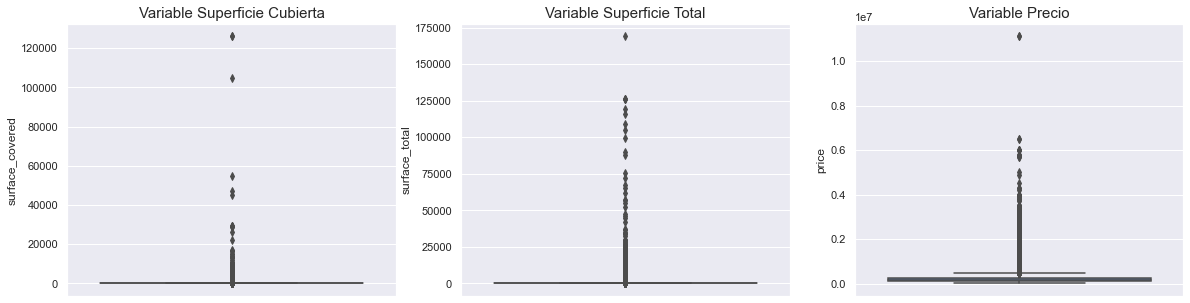

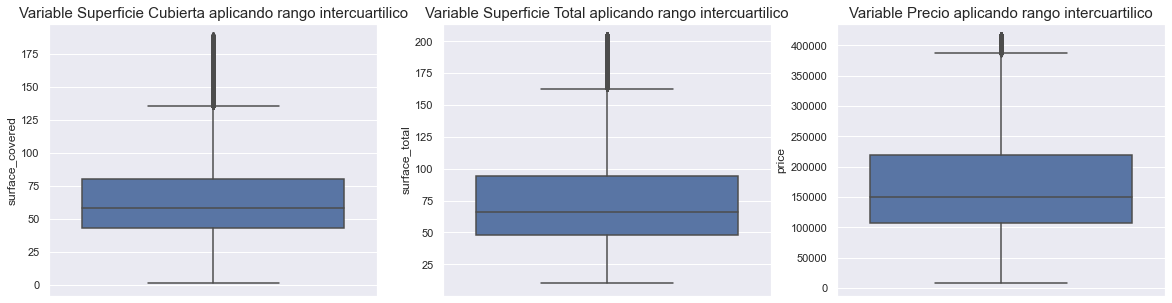

El tamaño del data set luego de eliminar los outliers: (90544, 19)


In [10]:
#Utilizo el metodo del rango intercuartil para eliminar los outliers de las variables surface_covered, surface_total y price.
#Realizo graficos de boxplot del antes y el despues para poder visualizar el cambio

print('El tamaño del data set:',ds_properati.shape)

plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sns.boxplot(data = ds_properati, y = 'surface_covered')
plt.title('Variable Superficie Cubierta', fontsize = 15)
plt.subplot(1,3,2)
sns.boxplot(data = ds_properati, y = 'surface_total')
plt.title('Variable Superficie Total', fontsize = 15)
plt.subplot(1,3,3)
sns.boxplot(data = ds_properati, y = 'price')
plt.title('Variable Precio', fontsize = 15)
plt.show()

q25,q75 = np.percentile(ds_properati.surface_covered, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
mascara_outliers = (ds_properati.surface_covered > minimo) & (ds_properati.surface_covered < maximo)
ds_properati = ds_properati[mascara_outliers]

q25,q75 = np.percentile(ds_properati.surface_total, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
mascara_outliers = (ds_properati.surface_total > minimo) & (ds_properati.surface_total < maximo)
ds_properati = ds_properati[mascara_outliers]

q25,q75 = np.percentile(ds_properati.price, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
mascara_outliers = (ds_properati.price > minimo) & (ds_properati.price < maximo)
ds_properati = ds_properati[mascara_outliers]

plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sns.boxplot(data = ds_properati, y = 'surface_covered')
plt.title('Variable Superficie Cubierta aplicando rango intercuartilico', fontsize = 15)
plt.subplot(1,3,2)
sns.boxplot(data = ds_properati, y = 'surface_total')
plt.title('Variable Superficie Total aplicando rango intercuartilico', fontsize = 15)
plt.subplot(1,3,3)
sns.boxplot(data = ds_properati, y = 'price')
plt.title('Variable Precio aplicando rango intercuartilico', fontsize = 15)
plt.show()

print('El tamaño del data set luego de eliminar los outliers:',ds_properati.shape)

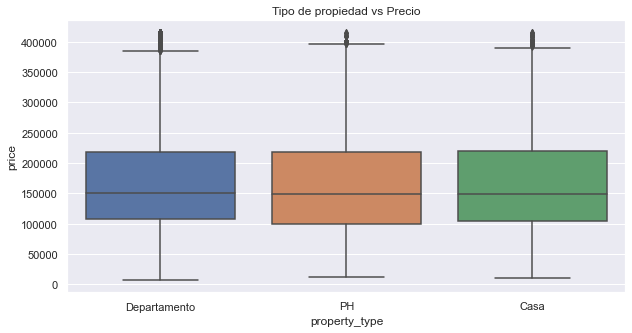

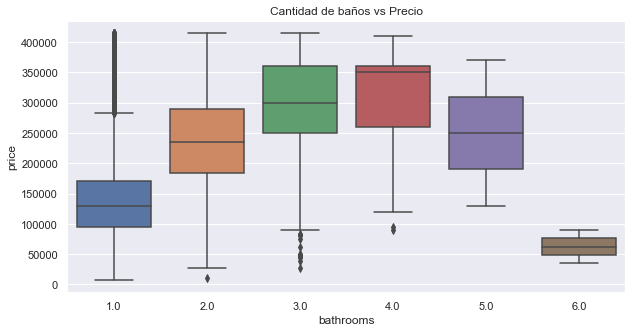

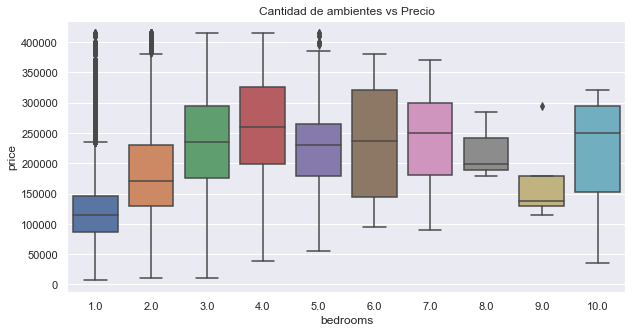

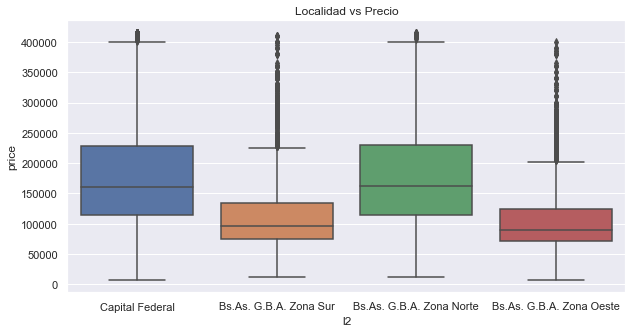

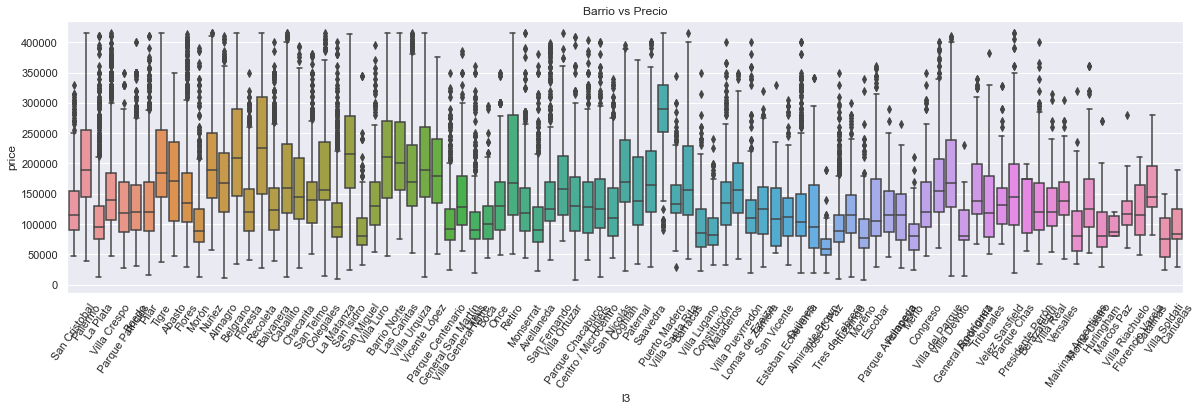

In [8]:
#Precio vs tipo de propiedad 
plt.figure( figsize = (10,5))
sns.boxplot(data = ds_properati, y = 'price', x = 'property_type')
plt.title('Tipo de propiedad vs Precio')

#Precio vs cantidad de baños
plt.figure( figsize = (10,5))
sns.boxplot(data = ds_properati, y = 'price', x = 'bathrooms')
plt.title('Cantidad de baños vs Precio')

#Precio vs cantidad de ambientes
plt.figure( figsize = (10,5))
sns.boxplot(data = ds_properati, y = 'price', x = 'bedrooms')
plt.title('Cantidad de ambientes vs Precio')

#Precio vs zona
plt.figure( figsize = (10,5))
sns.boxplot(data = ds_properati, y = 'price', x = 'l2')
plt.title('Localidad vs Precio')

#Precio vs cantidad de habitaciones
plt.figure( figsize = (20,5))
sns.boxplot(data = ds_properati, y = 'price', x = 'l3')
plt.title('Barrio vs Precio')
plt.xticks(rotation = 55)
plt.show()


In [ ]:
#Con estos graficos, obervamos que hay una relacion entre el precio de la propiedad y la zona donde esta ubicada, y tambien con respecto a la cantidad de ambientes/baños que tiene
#En cuanto al tipo de propiedad no se ve gran variacion en cuanto a la media.

In [11]:
##Transformacion de datos 

#Hay una relacion entre el precio de las propiedades y el tipo de propiedad, tambien con el precio y la ubicacion, 
#por lo tanto voy a crear variables dummies a partir de la variable property_type, l2 y l3 para poder ingresarlas al modelo.

zona = pd.get_dummies(ds_properati.l2)
ds_properati = ds_properati.join(zona)

#barrio = pd.get_dummies(ds_properati.l3)
#ds_properati = ds_properati.join(barrio)

prop_type = pd.get_dummies(ds_properati.property_type)
ds_properati = ds_properati.join(prop_type)

ds_properati.head()
print(ds_properati.shape)

(90544, 26)


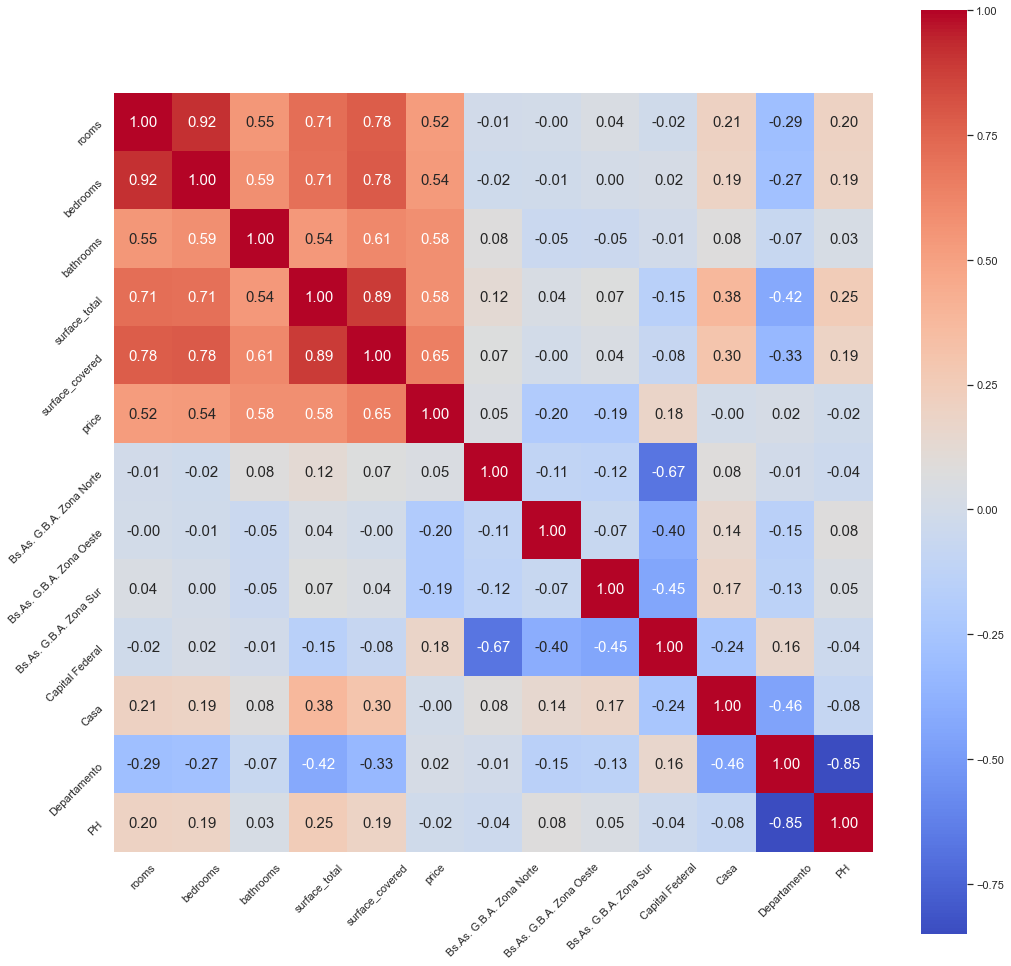

In [10]:
col = ['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 
       'currency', 'title', 'description', 'property_type', 'operation_type']

        
corr = ds_properati.drop(columns = col).corr()

plt.figure(figsize=(17,17))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= ds_properati.drop(columns =col).columns, 
           yticklabels= ds_properati.drop(columns = col).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [12]:
#Como la variable rooms y bedrooms tienen 0.91 de correlacion, elimino una de ellas ya que no me aporta mucha informacion extra 
col = ['price', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'currency', 'title', 'description', 'property_type', 'operation_type', 'rooms']

X =  ds_properati.drop(columns = col)
y =  ds_properati.price

print('Columnas de X:', X.columns)
print(X.shape)

print('\nCantidad de valores faltantes por columna:\n',X.isna().sum())
X

Columnas de X: Index(['bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste',
       'Bs.As. G.B.A. Zona Sur', 'Capital Federal', 'Casa', 'Departamento',
       'PH'],
      dtype='object')
(90544, 11)

Cantidad de valores faltantes por columna:
 bedrooms                    0
bathrooms                   0
surface_total               0
surface_covered             0
Bs.As. G.B.A. Zona Norte    0
Bs.As. G.B.A. Zona Oeste    0
Bs.As. G.B.A. Zona Sur      0
Capital Federal             0
Casa                        0
Departamento                0
PH                          0
dtype: int64


,bedrooms,bathrooms,surface_total,surface_covered,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Capital Federal,Casa,Departamento,PH
0,7.0,2.0,140.0,140.0,0,0,0,1,0,1,0
2,1.0,1.0,45.0,45.0,0,0,0,1,0,0,1
3,1.0,1.0,85.0,50.0,0,0,0,1,0,0,1
4,1.0,1.0,50.0,35.0,0,0,1,0,0,0,1
5,1.0,1.0,56.0,56.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
146655,1.0,1.0,54.0,48.0,0,0,1,0,0,1,0
146656,3.0,2.0,164.0,90.0,1,0,0,0,0,1,0
146657,1.0,1.0,50.0,35.0,1,0,0,0,0,1,0
146658,1.0,1.0,38.0,38.0,1,0,0,0,0,1,0


In [13]:
#Separo una parte de los datos para luego testear el modelo
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
#Escalo los datos fiteando solo sobre el Train no sobre el Test 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [ ]:
#Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo 
#dataset transformado. Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. 
#¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, 
#intenta explicar a qué se debe.

In [15]:
#Entreno el mismo modelo de Arboles de decision que habia entrenado en el Proyecto 1
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 9, random_state=42)

tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train con Arbol de decision de profundidad 9: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test con Arbol de decision de profundidad 9: {rmse_test}')

Raíz del error cuadrático medio en Train con Arbol de decision de profundidad 9: 45199.69852122018
Raíz del error cuadrático medio en Test con Arbol de decision de profundidad 9: 46033.89734961767


In [ ]:
#En el proyecto 1 la raiz del error cuadrático medio en Test con Arbol de decision de profundidad 9 me había dado 171271.152338624
#En este caso, realizando un analisis de datos distinto: en el cual elimine los outliers usando el metodo del rango intercuartil, 
#en vez de eliminar los valores faltantes, los completé utilizando el metodo de vecinos mas cercanos, e incorporando variables como l2 y 
#tipo de propiedad, el error disminuyó a 46033.89734961767 con el mismo modelo.

In [16]:
#Entreno el mismo modelo de KNN que habia entrenado en el Proyecto 1
from sklearn.neighbors import KNeighborsRegressor

neighbor = KNeighborsRegressor(n_neighbors = 4)
neighbor.fit(X_train, y_train)
y_train_pred = neighbor.predict(X_train)
y_test_pred = neighbor.predict(X_test)


rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train con KNN, k = 4: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test con KNN, k = 4: {rmse_test}')


Raíz del error cuadrático medio en Train con KNN, k = 4: 38421.90033626644
Raíz del error cuadrático medio en Test con KNN, k = 4: 44855.08085289141


In [ ]:
#En el caso del modelo de vecinos mas cercanos, en el proyecto 1 la raíz del error cuadrático medio en Test 
#con KNN, k = 4 me había dado 169699.87577869956.
#En este caso, usando el mismo modelo pero con las modificaciones en los features, valores faltantes y eliminacion de outliers, 
#se redujo a 44855.08085289141

In [17]:
#Regresion lineal, igual al proyecto 1
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred_lin = linear_model.predict(X_train)
y_test_pred_lin = linear_model.predict(X_test)

rmse_train_lin = np.sqrt(mean_squared_error(y_train, y_train_pred_lin))
rmse_test_lin = np.sqrt(mean_squared_error(y_test, y_test_pred_lin))
print(f'Raíz del error cuadrático medio en Train con regresion lineal: {rmse_train_lin}')
print(f'Raíz del error cuadrático medio en Test con regresion lineal: {rmse_test_lin}')


Raíz del error cuadrático medio en Train con regresion lineal: 51381.14379677063
Raíz del error cuadrático medio en Test con regresion lineal: 50783.24367197607


In [18]:
#En el caso de regresion lineal comun, el error disminuyo, en el proyecto 1 era 218957.05421795268, ahora me da 50783.24367197607
print('Coeficientes del modelo:',linear_model.coef_)
print('Término independiente',linear_model.intercept_)

Coeficientes del modelo: [-3.55189987e+04  1.56787303e+05  1.02400065e+05  2.27263816e+05
 -1.32548768e+17 -1.32548768e+17 -1.32548768e+17 -1.32548768e+17
  1.19132507e+18  1.19132507e+18  1.19132507e+18]
Término independiente -1.0587763003327241e+18


In [ ]:
#El valor de los coeficientes representan el cambio medio de la respuesta dado un cambio de una unidad en X. 
#En este caso, las primeras cuatro variables son las que menos peso tienen, a partir de la quinta, el valor incrementa, siendo estas
#variables las de mayor peso al momento de definir la variable target (el precio). 
#Esas variables corresponden a :
#Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste','Bs.As. G.B.A. Zona Sur', 'Capital Federal', 'Casa', 'Departamento','PH'

In [ ]:
#PARTE B - Modelos Avanzados

In [ ]:
# 1- Elige dos de los modelos avanzados vistos. Compara con el desempeño obtenido en el proyecto 01 
#(en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). 
#Entrénalos y evalúalos con sus argumentos por defecto.
#No te olvides de hacer un train/test split y usar Validación Cruzada.

# 2- Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

Raíz del error cuadrático medio en Train con regresion lineal con atributos polinomicos grado,2,: 47726.22791259958
Raíz del error cuadrático medio en Test con regresion lineal con atributos polinomicos grado,2,: 47453.45751729377
Raíz del error cuadrático medio en Train con regresion lineal con atributos polinomicos grado,3,: 46985.29813509255
Raíz del error cuadrático medio en Test con regresion lineal con atributos polinomicos grado,3,: 47005.2868926711
Raíz del error cuadrático medio en Train con regresion lineal con atributos polinomicos grado,4,: 46526.178591668315
Raíz del error cuadrático medio en Test con regresion lineal con atributos polinomicos grado,4,: 48158.43338359499
Raíz del error cuadrático medio en Train con regresion lineal con atributos polinomicos grado,5,: 45979.646971675094
Raíz del error cuadrático medio en Test con regresion lineal con atributos polinomicos grado,5,: 22709677271055.18


Text(0, 0.5, 'Raíz del error cuadrático medio')

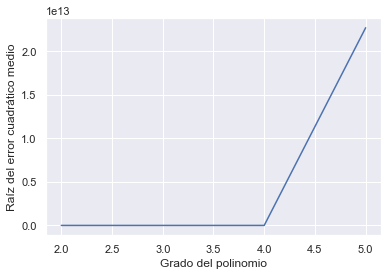

In [22]:
#Agrego atributos polinomicos a la regresion lineal para que se ajuste mas a los datos

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

degrees = [2, 3, 4, 5]
error_test = []
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)


    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)

    y_train_pred_poly = poly_reg.predict(X_train_poly)
    y_test_pred_poly = poly_reg.predict(X_test_poly)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))
    error_test.append(rmse_test)
    print(f'Raíz del error cuadrático medio en Train con regresion lineal con atributos polinomicos grado,{deg},: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test con regresion lineal con atributos polinomicos grado,{deg},: {rmse_test}')
    
    if min_rmse > rmse_test:
        min_rmse = rmse_test
        min_deg = deg

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, error_test)
ax.set_xlabel('Grado del polinomio')
ax.set_ylabel('Raíz del error cuadrático medio')

In [19]:
rmse_test_poly = 47005.2868926711

In [ ]:
#Con el ciclo for lo que estoy buscando es el grado del polinomio que mejor ajusta a los datos. 
#Voy probando con distintos grados de polinomio. Elijo el grado 3 ya que a partir del grado 4 el error en el Test va aumentando. 
#Con un polinomio de grado 3 el error baja a 47005.2868926711

In [20]:
#Regresion lineal con polynomial features grado 3 (el que me dio menor error) y regularizacion Lasso
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

lasso = Lasso()
lasso.fit(X_train_poly,y_train)

y_train_pred = lasso.predict(X_train_poly)
y_test_pred = lasso.predict(X_test_poly)

rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train con Polynomial Features de grado 3 y Regularizacion Lasso (hypep por defecto): {rmse_train_lasso}')
print(f'Raíz del error cuadrático medio en Test con Polynomial Features de grado 3 y Regularizacion Lasso (hypep por defecto): {rmse_test_lasso}')

Raíz del error cuadrático medio en Train con Polynomial Features de grado 3 y Regularizacion Lasso (hypep por defecto): 47163.97745483563
Raíz del error cuadrático medio en Test con Polynomial Features de grado 3 y Regularizacion Lasso (hypep por defecto): 47010.092260067635


/Users/eugeniabezek/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32096629582844.867, tolerance: 41730906081.51616
  model = cd_fast.enet_coordinate_descent(


In [25]:
#Usando un polinomio de grado 3 con regularizacion por Lasso el error disminuye a 47010.092260067635
print('Coeficientes del modelo:',lasso.coef_)
print('Término independiente',lasso.intercept_)

Coeficientes del modelo: [ 6.82385178e+04  1.97965048e+05  1.37376855e+05  6.16078924e+04
 -5.01688188e+03 -3.98388939e+04 -4.97454240e+04  1.38859529e+04
 -1.69063916e+04  2.13763702e+04 -0.00000000e+00 -2.03964948e+05
  0.00000000e+00  1.41336316e+04  9.90203410e+04  0.00000000e+00
 -0.00000000e+00 -2.73856198e+04  1.97544817e+03 -0.00000000e+00
 -2.32927731e+04  4.93205992e+03 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -6.16833201e+04 -2.09887977e+04
  4.83536767e+01 -2.34235715e+04  1.07466035e+04 -5.27238469e+04
 -8.94134032e+04  1.06723707e+05 -0.00000000e+00 -2.18259476e+04
 -2.96126906e+02  4.52036079e+04 -2.22798456e+04  1.03045173e+05
 -2.71691714e+04 -2.66742122e+04  3.59956245e+04 -0.00000000e+00
 -2.82950867e+04 -6.60934148e+03 -1.85348881e+04 -1.64143489e+03
  4.27990879e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.40037661e+03 -2.91735140e+03  1.34606026e+01
  1.40368126e+04  0.00000000e+00  0.00000000e+00  1.14582946e+02


In [ ]:
#La regularización Lasso incluye una penalización a los coeficientes para aquellas variables de entrada que no contribuyen mucho a la predicción. Esta penalización permite que algunos valores de coeficientes lleguen al valor de cero.
#Como vemos en este caso, hay varios coeficientes que tienen valor 0, esto se debe a que no son importantes al momento de predecir la variable target

In [21]:
#RandomizedSearch CV y Random Forest 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor(random_state=42)
# Random Search
model = RandomizedSearchCV(rand_forest,param_distributions={'max_depth': np.arange(2, 16)}, cv=5, refit=True)

model.fit(X_train, y_train)

print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

#Hago las predicciones con el modelo 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train con Random Forest utilizando Randomized Search CV: {rmse_train_forest}')
print(f'Raíz del error cuadrático medio en Test con Random Forest utilizando Randomized Search CV: {rmse_test_forest}')

model_rf = model

Mejores parametros: {'max_depth': 15}
Mejor Score: 0.7302292798852352

Raíz del error cuadrático medio en Train con Random Forest utilizando Randomized Search CV: 35189.33757362683
Raíz del error cuadrático medio en Test con Random Forest utilizando Randomized Search CV: 41417.698366012235


In [ ]:
#Usando Random Forest con una grilla Randomized variando la profundidad de los arboles, el error se redujo a 41417.698366012235

In [27]:
print('Importancia de atributos:',model_rf.best_estimator_.feature_importances_)

Importancia de atributos: [0.02615431 0.08715617 0.17425093 0.5594406  0.02377957 0.00403422
 0.00575455 0.07392912 0.00163043 0.03840705 0.00546305]


In [ ]:
#Las variables son: (['bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste', 
#   'Bs.As. G.B.A. Zona Sur', 'Capital Federal', 'Casa', 'Departamento', 'PH'],
#En el modelo seleccionado, la variable de mayor importancia fue la de superficie cubierta, la cual represetna el 56% en cuanto al peso
#al momento de predecir la variable target. La que menos peso tiene es la variable 'Casa'

In [45]:
#Modelo knn con Randomized Search CV para buscar el mejor parametro n_neighbors
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor()
model = RandomizedSearchCV(knn,param_distributions={'n_neighbors': np.arange(2, 16)}, cv=3, refit=True)
model.fit(X_train, y_train)

print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train con KNN: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test con KNN: {rmse_test}')


Mejores parametros: {'n_neighbors': 9}
Mejor Score: 0.6917935768829532

Raíz del error cuadrático medio en Train con KNN: 40438.37651385347
Raíz del error cuadrático medio en Test con KNN: 43900.96275942201


In [23]:
#Bagging con estimador knn
from sklearn.ensemble import BaggingRegressor

bagging_regressor_knn = BaggingRegressor(KNeighborsRegressor(n_neighbors = 9), random_state=42)
bagging_regressor_knn.fit(X_train, y_train)

y_train_pred = bagging_regressor_knn.predict(X_train)
y_test_pred = bagging_regressor_knn.predict(X_test)

rmse_train_bagg_knn = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_bagg_knn = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_bagg_knn}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_bagg_knn}')

Raíz del error cuadrático medio en Train: 39833.61001887818
Raíz del error cuadrático medio en Test: 43226.82438061324


In [ ]:
#El error usando ensamble tipo bagging con estimador knn con n_neighbors = 9 me dio 43226.82438061324

In [22]:
#Adaboost con estimador knn 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics as metrics
                     
model_ada_knn = AdaBoostRegressor(KNeighborsRegressor(n_neighbors = 9),random_state=42)
model_ada_knn.fit(X_train, y_train)

y_train_pred = model_ada_knn.predict(X_train)
y_test_pred = model_ada_knn.predict(X_test)

rmse_train_ada_knn = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_ada_knn = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train con Boosting de knn: {rmse_train_ada_knn}')
print(f'Raíz del error cuadrático medio en Test con Boosting de knn: {rmse_test_ada_knn}')

Raíz del error cuadrático medio en Train con Boosting de knn: 42941.274726229516
Raíz del error cuadrático medio en Test con Boosting de knn: 46818.500441272445


In [ ]:
#El error usando ensamble tipo boosting con estimador knn con n_neighbors = 9 me dio 46818.500441272445

In [24]:
#Adaboost con RandomSearchCV y estimador Decision Tree

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

params = {'base_estimator': [DecisionTreeRegressor(max_depth = 2), DecisionTreeRegressor(max_depth = 3), DecisionTreeRegressor(max_depth = 4),
                            DecisionTreeRegressor(max_depth = 5), DecisionTreeRegressor(max_depth = 6), DecisionTreeRegressor(max_depth = 7),
                            DecisionTreeRegressor(max_depth = 8), DecisionTreeRegressor(max_depth = 9), DecisionTreeRegressor(max_depth = 10),
                            DecisionTreeRegressor(max_depth = 11), DecisionTreeRegressor(max_depth = 12), DecisionTreeRegressor(max_depth = 13), 
                            DecisionTreeRegressor(max_depth = 14), DecisionTreeRegressor(max_depth = 15)]}

model_ada_grid_tree = RandomizedSearchCV(AdaBoostRegressor(random_state=42), param_distributions =params, cv=3)
model_ada_grid_tree = model_ada_grid_tree.fit(X_train, y_train)

print('Best Score: %.3f'%model_ada_grid_tree.best_score_)
print('Best Parameters : ',model_ada_grid_tree.best_params_)

y_train_pred = model_ada_grid_tree.predict(X_train)
y_test_pred = model_ada_grid_tree.predict(X_test)

rmse_train_ada_for = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_ada_for = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_ada_for}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_ada_for}')

Best Score: 0.653
Best Parameters :  {'base_estimator': DecisionTreeRegressor(max_depth=14)}
Raíz del error cuadrático medio en Train: 43470.14851880746
Raíz del error cuadrático medio en Test: 47488.72015622502


In [ ]:
#Usando ensamble tipo boosting con modelo de arbol de decision y randomized search para encontrar el mejor parametro max_depth me dio 47488.72015622502

In [25]:
#XGBoost
import xgboost as xgb

parameters = {
    'n_estimators' : [170, 175, 180],
    'learning_rate' : [0.075, 0.08, 0.1],
    'max_depth' : np.arange(2,16)
}

model_XGB = xgb.XGBRegressor()
model_XGB_CV = RandomizedSearchCV(model_XGB, param_distributions=parameters).fit(X_train, y_train)

print(model_XGB_CV.best_params_)

y_test_pred_XGB = model_XGB_CV.predict(X_test)
y_train_pred_XGB = model_XGB_CV.predict(X_train)
     
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_XGB))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_XGB))
print(f'Raíz del error cuadrático medio: {rmse_train_xgb}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_xgb}')

{'n_estimators': 180, 'max_depth': 12, 'learning_rate': 0.1}
Raíz del error cuadrático medio: 31861.14161719667
Raíz del error cuadrático medio en Test: 40805.99747032577


In [26]:
#Usando el XGboosting, con Randomizedsearch CV el error me da 40805.99747032577

print('Importancia de parametros: ', model_XGB_CV.best_estimator_.feature_importances_)

Importancia de parametros:  [0.01810437 0.13491286 0.04948925 0.18588203 0.07159451 0.01694606
 0.02515288 0.36510637 0.01266017 0.0859255  0.03422594]


In [ ]:
#Las varialbes son: 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste', 
# 'Bs.As. G.B.A. Zona Sur', 'Capital Federal', 'Casa', 'Departamento', 'PH']
#En este caso vemos que la variable que mas peso tuvo al momento de predecir la variable target es si la propiedad queda en 
#Capital Federal o no (39,6%), seguido por la superficie cubierta (15,9%) y la cantidad de baños (13,4%)

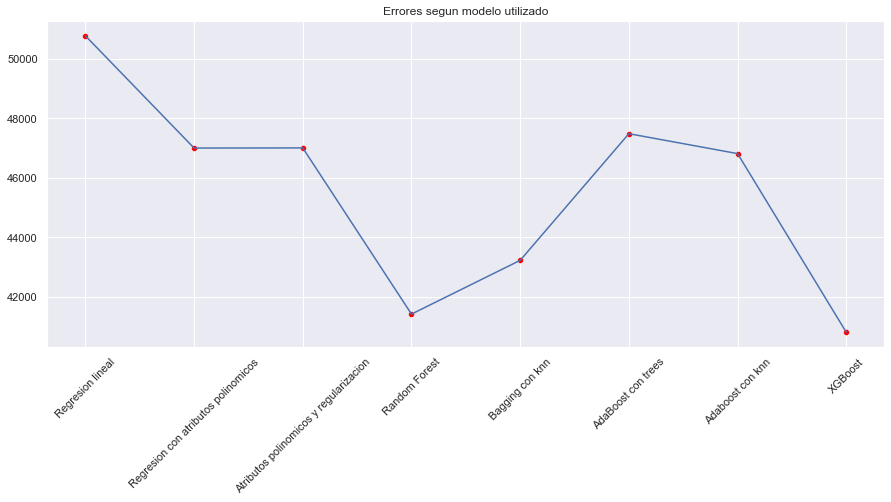

In [27]:
# 3- Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.
#Grafico los errores de todos los modelos

errores = [rmse_test_lin, rmse_test_poly, rmse_test_lasso, rmse_test_forest, rmse_test_bagg_knn, rmse_test_ada_for, rmse_test_ada_knn, rmse_test_xgb]
labels = ['Regresion lineal', 'Regresion con atributos polinomicos', 'Atributos polinomicos y regularizacion',  'Random Forest', 'Bagging con knn', 'AdaBoost con trees', 'Adaboost con knn', 'XGBoost']

plt.figure( figsize = (15,6))
sns.scatterplot(x = labels, y = errores, color = 'red')
plt.plot(errores)
plt.xticks(rotation = 45)
plt.title('Errores segun modelo utilizado')
plt.show()

In [ ]:
#El modelo que menor error me da es el XGBoost, con un error de 40989.28891091759, seguido por el Random Forest con 
#error de 41417.698366012235

In [ ]:
#PARTE C - Interpretación de modelos

In [ ]:
#¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? 

In [ ]:
#En el caso del modelo XGBoost, que fue el modelo con menor error, el atributo que mas importancia tuvo es el que identifica si la propiedad
#esta ubicada en Capital Federal o no, seguido por superficie cubierta y cantidad de baños/
#En el caso de Random Forest, que es el segundo modelo que mejor resultado dio, la principal variable fue superficie cubierta (56%)

In [34]:
#Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y 
#observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? 

#Analizo alguno arboles del ensable que usé 

rand_forest.fit(X_train,y_train)

tree = rand_forest.estimators_[3]
print('Importancia de atributos para arbol numero 3: ',tree.feature_importances_)
print(tree.get_params())

tree = rand_forest.estimators_[8]
print('\n\nImportancia de atributos para arbol numero 8: ',tree.feature_importances_)
print(tree.get_params())

tree = rand_forest.estimators_[10]
print('\n\nImportancia de atributos para arbol numero 10: ',tree.feature_importances_)
print(tree.get_params())

tree = rand_forest.estimators_[14]
print('\n\nImportancia de atributos para arbol numero 14: ',tree.feature_importances_)
print(tree.get_params())


Importancia de atributos para arbol numero 3:  [0.02896819 0.08140987 0.19446893 0.55586299 0.02131588 0.00356879
 0.00451229 0.06984703 0.00170335 0.03578525 0.00255744]
{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 787846414, 'splitter': 'best'}


Importancia de atributos para arbol numero 8:  [0.02695938 0.07862904 0.20310833 0.54842262 0.02277955 0.00353631
 0.00478634 0.06804609 0.00182225 0.03813699 0.00377309]
{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 670094950, 'splitter': 'best'}


Importancia de atribut

In [ ]:
#En cuanto a los estimadores que forman parte del Random Forest, la importancia de caracteristicas es similar a la del ensamble completo,
#siendo la de mayor importancia la tercera, explica aproximadamente el 45% de la varialbe objetivo (el precio).
#Lo que se diferencia entre ellos son los datos que se utilizaron para entrenar cada uno. 

/Users/eugeniabezek/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/eugeniabezek/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


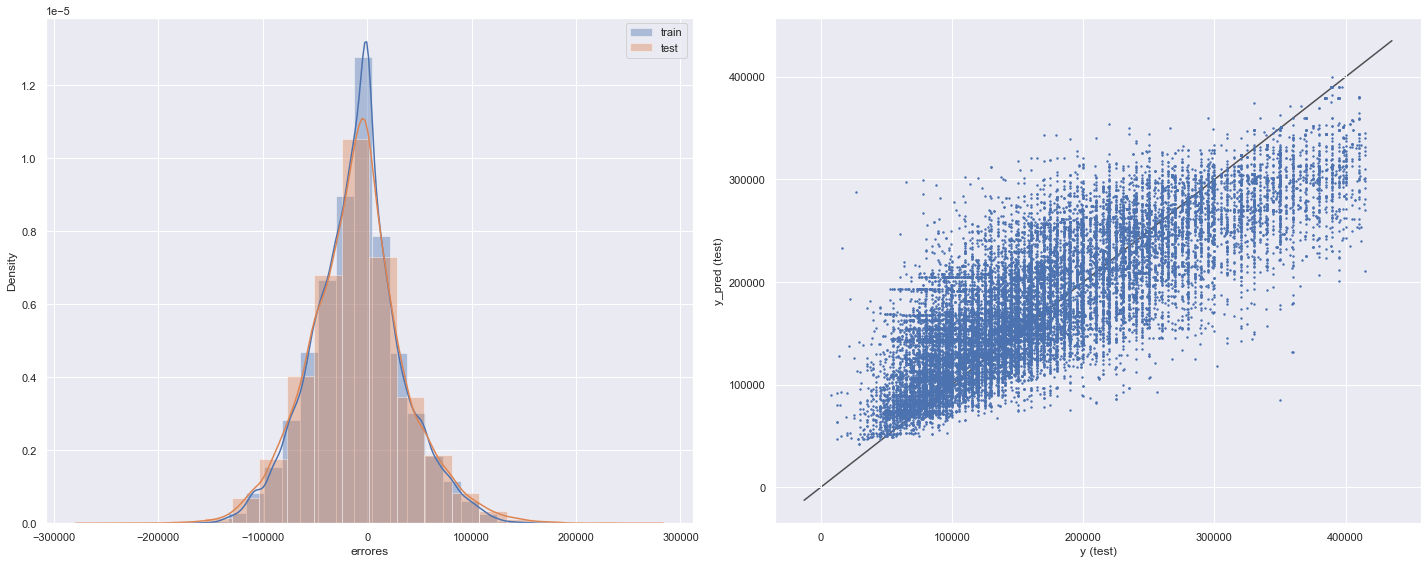

In [28]:
#¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? 
#¿Dónde falla? ¿A qué se debe?

#El modelo elegido por el menor error es el XGBoost

#Grafico los errores de los estimado vs lo real

y_test_pred_XGB = model_XGB_CV.predict(X_test)
y_train_pred_XGB = model_XGB_CV.predict(X_train)
     
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_XGB))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_XGB))

plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()
ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()

plt.show()

In [ ]:
#En cuanto a la distribucion de los errores, en el grafico de la izquierda vemos que la distribucion de los errores 
#sigue una distribución normal, centrada en el cero, lo cual es lo esperado ya que lo que estamos graficando es la 
#diferencia entre lo real y lo predicho, cuanto mas cerca de cero de este resultado, mas se van a parecer los datos que
#el modelo predijo a los reales.
#En el grafico de la derecha, se muestra los valores predichos en el eje y, y los valores reales en el eje x. 
#En este caso, lo esperado es que los valores caigan sobre la recta de pendiente 1 de forma que cada valor predicho 
#sea igual al valor real, lo que vemos es que la nube de puntos tiende a agruparse alrededor de la recta de pendiente 1
#en los valores mas bajos, pero en los valores mas altos el modelo tiende a alejarse más de esta recta.
#Por lo tanto, puedo concluir en que el modelo estima los valores de las propiedades con un error de USD 44622.99, 
#y funciona mejor para los valores bajos, a partir de los USD 250000 la dispersión es mayor, los valores se alejan
#de la recta ideal. 

In [ ]:
#DESAFÍO OPCIONAL

#Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad 
#para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? 
#Te dejamos preguntas que pueden servir como disparadoras: 
#¿Qué barrios se parecen más entre sí?
#¿Qué tipos de propiedades se parecen más entre sí?

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)
pca2 = PCA(n_components=2)
X_train_transf = pca2.fit_transform(X_train) 
X_test_transf = pca2.fit_transform(X_test) 
print(pca2.explained_variance_)
print(pca2.components_)

[0.30786849 0.23763123]
[[ 0.02471969  0.01749222  0.12763779  0.07378332  0.43221827  0.13592056
   0.16786872 -0.73600755  0.12779957 -0.3619555   0.23415593]
 [ 0.06037356  0.01799161  0.13326805  0.09503192 -0.33133659  0.0104237
  -0.02333132  0.3442442   0.06270741 -0.63732423  0.57461682]]


In [39]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X_train_transf)
db.fit(X_test_transf)

# Consulto las etiquetas
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0) #le resto un valor si fue considerado ruido
n_noise = list(labels).count(-1)

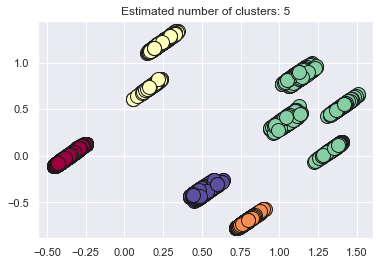

In [40]:
# Funcion para plotear
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Armamos una mascara, con unos en los datos que son CORES.
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    # Plot result

    # Black removed and is used for noise instead.
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_1)
    plt.show()
    return

plot_DBSCAN(X_test_transf,labels,db,n_clusters)

In [ ]:
#Decidi usar el metodo DBSCAN ya que no tenía en claro cuantos cluster definir a priori.
#En el gráfico observamos que se forman 5 grupos, si considero que el cluster violeta y el naranja son uno, tendriamos 4 cluster, que pueden
#representar los 4 grupos de localidades: Capital Federal, GBA Norte, GBA Oeste y GBA Sur. 
#Pero al no conocer exactamente cuales son las dos variables que estoy graficando, ya qeu usé el metodo PCA para reducir la cantidad a 2, 
#no conozco exactamente cuáles son las variables que está teniendo en cuenta. 